## Spectral leakage

Cuando se calcula la transformada discreta de Fourier (DFT) de una señal (por ejemplo, para obtener la densidad espectral de potencia), el manchado espectral o leakage ocurrirá si alguna de las componentes frecuenciales cae entre frecuencias de referencia.

El leakage también tiene lugar cuando se calcula la DFT de una señal que contiene el resto de un ciclo. Por ejemplo, si una onda senoidal de 3 Hz se muestrea durante 0.9 segundos, se produce una discontinuidad, la cual causa un manchado espectral. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal
from numpy import pi

from IPython.display import Image  

from scipy.fftpack import fft, fftfreq
from time import time

%matplotlib inline
params = {'legend.fontsize': 16,
          'figure.figsize': (10, 8),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
plt.rcParams.update(params) 


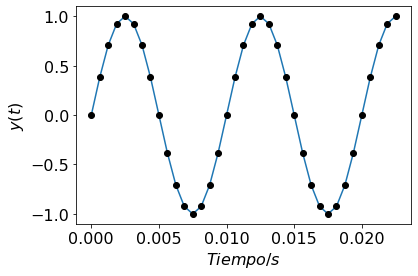

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


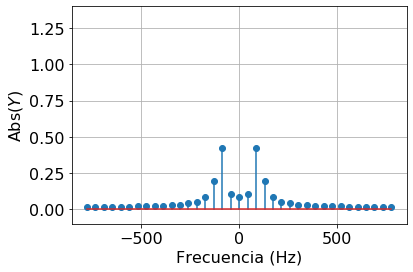

In [22]:
# A continuación se define la función de la señal en función del tiempo. 
# Parametros de la señal
fm  = 100.0     # Hz
Am  = 1         # amplitud
Nm  = 2.3       # Numero de periodos

# Muestreo
fs  = f * 16     # muestreo
ds  = 1 / (fs)  # Espaciado (puntos por período)

# Vector tiempo
# np.arange( inicio, fin, delta)
t1  = np.arange(0, Nm/fm, ds)  # Intervalo de tiempo en segundos 

# Señal
y1 = Am*np.sin(2 * pi * f * t1)  # Señal

# PLOT 
plt.plot(t1, y1)
plt.plot(t1, y1, 'ko')
plt.xlabel('$Tiempo/s$')
plt.ylabel('$y(t)$')
plt.show()


Y = fft(y1) / len(y1)  # Normalizada
frq2 = fftfreq(len(y1), ds)  # Recuperamos las frecuencias

plt.stem(frq2, np.abs(Y) )  # Representamos la parte imaginaria
plt.ylim(-0.1, 1.4)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

## Zero Padding


Zero padding es una tecnica empleada con el objetivo de tener ventanas con numeros de bines multiplos de 2. Para ello se agregan ceros al final de la muestra.

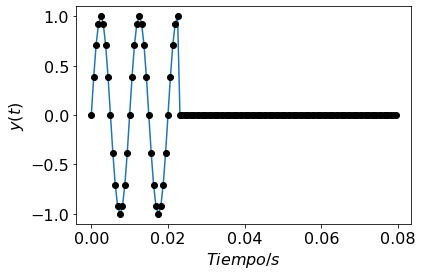

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


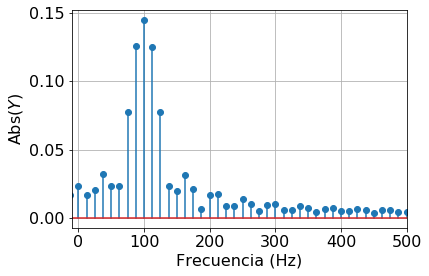

In [23]:
Nt  = 128
Nz  = Nt - len(y)
y2 =  np.append(y1,np.zeros(Nz) )
t2  =  np.arange(0, ds*Nt, ds)  # Intervalo de tiempo en segundos 

Y2 = fft(y2) / len(y2)  # Normalizada
frq2 = fftfreq(len(y2), ds)  # Recuperamos las frecuencias

# PLOT 
plt.plot(t2, y2)
plt.plot(t2, yzp, 'ko')
plt.xlabel('$Tiempo/s$')
plt.ylabel('$y(t)$')
plt.show()


plt.stem(frq2, np.abs(Y2) )  # Representamos la parte imaginaria
plt.xlim(-10, 500)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

## Ventanas 

Existe una manera de reducir la fuga y es mediante el uso de funciones ventana. Las funciones ventana no son más que funciones que valen cero fuera de un cierto intervalo, y que en procesamiento de señales digitales se utilizan para «suavizar» o filtrar una determinada señal. NumPy trae unas cuantas funciones ventana por defecto; por ejemplo, la ventana de Blackman tiene este aspecto


Como se puede ver, en los extremos del intervalo es nula. Las funciones ventana reciben un único argumento que es el número de puntos. Si multiplicamos la ventana por la señal, obtenemos una nueva señal que vale cero en los extremos. Comprobemos el resultado, representando ahora el espectro de amplitud y comparando cómo es el resultado si aplicamos o no la ventana de Blackman.

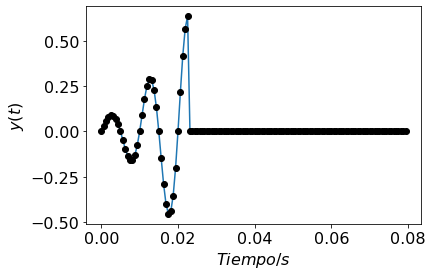

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


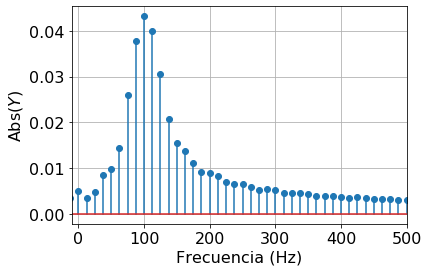

In [28]:
#y4 = y4 * np.bartlett(M)
#y4 = y4 * np.blackman(M) 
y3 = y2 * np.hamming(Nt) 
#y4 = y4 * np.hanning(M) 
#y4 = y4 * np.kaiser(M, 10) 

Y3 = fft(y3) / len(y3)  # Normalizada
frq3 = fftfreq(len(y3), ds)  # Recuperamos las frecuencias


# PLOT 
plt.plot(t2, y3)
plt.plot(t2, y3, 'ko')
plt.xlabel('$Tiempo/s$')
plt.ylabel('$y(t)$')
plt.show()


plt.stem(frq3, np.abs(Y3) )  # Representamos la parte imaginaria
plt.xlim(-10, 500)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()